## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  82.898422  1461.121359  0.580387  7.477366  1.486752
1  88.180937   170.705337  0.388363  6.633458  0.603969
2  83.184676   849.278864  0.676144  2.987028  1.498936
3  42.326184  1321.850194  0.928117  2.550005  1.545627
4  57.696028  1345.415355  0.928959  9.193919  1.672414


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9646535	total: 51.4ms	remaining: 51.4s
1:	learn: 0.9547122	total: 52.3ms	remaining: 26.1s
2:	learn: 0.9459468	total: 53.1ms	remaining: 17.6s
3:	learn: 0.9352583	total: 53.8ms	remaining: 13.4s
4:	learn: 0.9257435	total: 54.9ms	remaining: 10.9s
5:	learn: 0.9165507	total: 55.3ms	remaining: 9.16s
6:	learn: 0.9059024	total: 57ms	remaining: 8.09s
7:	learn: 0.8975764	total: 59ms	remaining: 7.32s
8:	learn: 0.8878523	total: 60ms	remaining: 6.61s
9:	learn: 0.8785214	total: 61ms	remaining: 6.04s
10:	learn: 0.8684830	total: 62.8ms	remaining: 5.64s
11:	learn: 0.8580878	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8486663	total: 63.7ms	remaining: 4.84s
13:	learn: 0.8383499	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8270494	total: 69.8ms	remaining: 4.58s
15:	learn: 0.8178875	total: 71.1ms	remaining: 4.37s
16:	learn: 0.8101734	total: 71.6ms	remaining: 4.14s
17:	learn: 0.8025967	total: 74.4ms	remaining: 4.06s
18:	learn: 0.7961534	total: 75ms	remaining: 3.87s
19

71:	learn: 0.4854074	total: 144ms	remaining: 1.86s
72:	learn: 0.4821430	total: 147ms	remaining: 1.87s
73:	learn: 0.4781708	total: 148ms	remaining: 1.85s
74:	learn: 0.4736475	total: 149ms	remaining: 1.84s
75:	learn: 0.4703462	total: 150ms	remaining: 1.82s
76:	learn: 0.4661450	total: 153ms	remaining: 1.84s
77:	learn: 0.4622556	total: 155ms	remaining: 1.84s
78:	learn: 0.4585412	total: 156ms	remaining: 1.82s
79:	learn: 0.4541922	total: 156ms	remaining: 1.8s
80:	learn: 0.4506628	total: 157ms	remaining: 1.78s
81:	learn: 0.4462617	total: 160ms	remaining: 1.79s
82:	learn: 0.4426011	total: 161ms	remaining: 1.77s
83:	learn: 0.4387632	total: 161ms	remaining: 1.76s
84:	learn: 0.4363309	total: 162ms	remaining: 1.74s
85:	learn: 0.4338614	total: 163ms	remaining: 1.73s
86:	learn: 0.4302767	total: 164ms	remaining: 1.72s
87:	learn: 0.4275851	total: 167ms	remaining: 1.74s
88:	learn: 0.4251874	total: 169ms	remaining: 1.73s
89:	learn: 0.4221194	total: 170ms	remaining: 1.72s
90:	learn: 0.4189775	total: 170m

122:	learn: 0.3370781	total: 222ms	remaining: 1.58s
123:	learn: 0.3350248	total: 223ms	remaining: 1.58s
124:	learn: 0.3327149	total: 226ms	remaining: 1.58s
125:	learn: 0.3301305	total: 228ms	remaining: 1.58s
126:	learn: 0.3281299	total: 229ms	remaining: 1.57s
127:	learn: 0.3256856	total: 229ms	remaining: 1.56s
128:	learn: 0.3239715	total: 230ms	remaining: 1.55s
129:	learn: 0.3228322	total: 231ms	remaining: 1.54s
130:	learn: 0.3207822	total: 231ms	remaining: 1.53s
131:	learn: 0.3185348	total: 232ms	remaining: 1.52s
132:	learn: 0.3167557	total: 235ms	remaining: 1.53s
133:	learn: 0.3143495	total: 235ms	remaining: 1.52s
134:	learn: 0.3123251	total: 235ms	remaining: 1.51s
135:	learn: 0.3108504	total: 240ms	remaining: 1.53s
136:	learn: 0.3090808	total: 241ms	remaining: 1.52s
137:	learn: 0.3071857	total: 241ms	remaining: 1.51s
138:	learn: 0.3051262	total: 242ms	remaining: 1.5s
139:	learn: 0.3032341	total: 243ms	remaining: 1.49s
140:	learn: 0.3013577	total: 244ms	remaining: 1.49s
141:	learn: 0

228:	learn: 0.1941644	total: 405ms	remaining: 1.36s
229:	learn: 0.1935012	total: 415ms	remaining: 1.39s
230:	learn: 0.1928099	total: 415ms	remaining: 1.38s
231:	learn: 0.1917166	total: 416ms	remaining: 1.38s
232:	learn: 0.1910452	total: 416ms	remaining: 1.37s
233:	learn: 0.1901525	total: 417ms	remaining: 1.36s
234:	learn: 0.1893581	total: 417ms	remaining: 1.36s
235:	learn: 0.1887916	total: 418ms	remaining: 1.35s
236:	learn: 0.1879766	total: 419ms	remaining: 1.35s
237:	learn: 0.1871213	total: 419ms	remaining: 1.34s
238:	learn: 0.1861957	total: 420ms	remaining: 1.34s
239:	learn: 0.1853433	total: 420ms	remaining: 1.33s
240:	learn: 0.1847911	total: 421ms	remaining: 1.32s
241:	learn: 0.1842697	total: 421ms	remaining: 1.32s
242:	learn: 0.1835193	total: 433ms	remaining: 1.35s
243:	learn: 0.1828886	total: 434ms	remaining: 1.34s
244:	learn: 0.1822338	total: 434ms	remaining: 1.34s
245:	learn: 0.1810917	total: 435ms	remaining: 1.33s
246:	learn: 0.1806938	total: 435ms	remaining: 1.33s
247:	learn: 

296:	learn: 0.1526229	total: 508ms	remaining: 1.2s
297:	learn: 0.1520461	total: 515ms	remaining: 1.21s
298:	learn: 0.1514582	total: 630ms	remaining: 1.48s
299:	learn: 0.1509318	total: 631ms	remaining: 1.47s
300:	learn: 0.1504416	total: 631ms	remaining: 1.47s
301:	learn: 0.1499337	total: 632ms	remaining: 1.46s
302:	learn: 0.1494446	total: 632ms	remaining: 1.45s
303:	learn: 0.1491577	total: 633ms	remaining: 1.45s
304:	learn: 0.1489033	total: 633ms	remaining: 1.44s
305:	learn: 0.1486091	total: 633ms	remaining: 1.44s
306:	learn: 0.1480794	total: 634ms	remaining: 1.43s
307:	learn: 0.1476963	total: 634ms	remaining: 1.43s
308:	learn: 0.1474212	total: 635ms	remaining: 1.42s
309:	learn: 0.1469657	total: 635ms	remaining: 1.41s
310:	learn: 0.1464987	total: 636ms	remaining: 1.41s
311:	learn: 0.1462291	total: 636ms	remaining: 1.4s
312:	learn: 0.1459642	total: 637ms	remaining: 1.4s
313:	learn: 0.1457031	total: 637ms	remaining: 1.39s
314:	learn: 0.1451990	total: 642ms	remaining: 1.4s
315:	learn: 0.14

328:	learn: 0.1398303	total: 654ms	remaining: 1.33s
329:	learn: 0.1396105	total: 655ms	remaining: 1.33s
330:	learn: 0.1389826	total: 655ms	remaining: 1.32s
331:	learn: 0.1388154	total: 663ms	remaining: 1.33s
332:	learn: 0.1386762	total: 663ms	remaining: 1.33s
333:	learn: 0.1384562	total: 664ms	remaining: 1.32s
334:	learn: 0.1381201	total: 665ms	remaining: 1.32s
335:	learn: 0.1378942	total: 665ms	remaining: 1.31s
336:	learn: 0.1376150	total: 666ms	remaining: 1.31s
337:	learn: 0.1374600	total: 667ms	remaining: 1.3s
338:	learn: 0.1370091	total: 668ms	remaining: 1.3s
339:	learn: 0.1365677	total: 669ms	remaining: 1.3s
340:	learn: 0.1363856	total: 671ms	remaining: 1.3s
341:	learn: 0.1357955	total: 672ms	remaining: 1.29s
342:	learn: 0.1355271	total: 673ms	remaining: 1.29s
343:	learn: 0.1351102	total: 674ms	remaining: 1.28s
344:	learn: 0.1349786	total: 675ms	remaining: 1.28s
345:	learn: 0.1347679	total: 675ms	remaining: 1.28s
346:	learn: 0.1345951	total: 676ms	remaining: 1.27s
347:	learn: 0.13

396:	learn: 0.1191819	total: 854ms	remaining: 1.3s
397:	learn: 0.1188641	total: 854ms	remaining: 1.29s
398:	learn: 0.1186425	total: 855ms	remaining: 1.29s
399:	learn: 0.1182215	total: 858ms	remaining: 1.29s
400:	learn: 0.1177448	total: 859ms	remaining: 1.28s
401:	learn: 0.1175301	total: 861ms	remaining: 1.28s
402:	learn: 0.1171982	total: 862ms	remaining: 1.28s
403:	learn: 0.1167319	total: 864ms	remaining: 1.27s
404:	learn: 0.1165223	total: 868ms	remaining: 1.27s
405:	learn: 0.1163155	total: 870ms	remaining: 1.27s
406:	learn: 0.1158611	total: 877ms	remaining: 1.28s
407:	learn: 0.1156589	total: 877ms	remaining: 1.27s
408:	learn: 0.1150835	total: 878ms	remaining: 1.27s
409:	learn: 0.1144568	total: 879ms	remaining: 1.26s
410:	learn: 0.1141765	total: 879ms	remaining: 1.26s
411:	learn: 0.1138762	total: 880ms	remaining: 1.25s
412:	learn: 0.1134934	total: 880ms	remaining: 1.25s
413:	learn: 0.1131798	total: 883ms	remaining: 1.25s
414:	learn: 0.1125745	total: 885ms	remaining: 1.25s
415:	learn: 0

460:	learn: 0.0989449	total: 949ms	remaining: 1.11s
461:	learn: 0.0987702	total: 952ms	remaining: 1.11s
462:	learn: 0.0985105	total: 952ms	remaining: 1.1s
463:	learn: 0.0982270	total: 953ms	remaining: 1.1s
464:	learn: 0.0980581	total: 955ms	remaining: 1.1s
465:	learn: 0.0978687	total: 957ms	remaining: 1.1s
466:	learn: 0.0974338	total: 958ms	remaining: 1.09s
467:	learn: 0.0973095	total: 960ms	remaining: 1.09s
468:	learn: 0.0970375	total: 963ms	remaining: 1.09s
469:	learn: 0.0966125	total: 963ms	remaining: 1.09s
470:	learn: 0.0964518	total: 964ms	remaining: 1.08s
471:	learn: 0.0961896	total: 964ms	remaining: 1.08s
472:	learn: 0.0959420	total: 965ms	remaining: 1.07s
473:	learn: 0.0958382	total: 965ms	remaining: 1.07s
474:	learn: 0.0955936	total: 966ms	remaining: 1.07s
475:	learn: 0.0951827	total: 966ms	remaining: 1.06s
476:	learn: 0.0949426	total: 967ms	remaining: 1.06s
477:	learn: 0.0945900	total: 967ms	remaining: 1.06s
478:	learn: 0.0943295	total: 968ms	remaining: 1.05s
479:	learn: 0.09

497:	learn: 0.0890478	total: 1.02s	remaining: 1.03s
498:	learn: 0.0887078	total: 1.02s	remaining: 1.02s
499:	learn: 0.0884550	total: 1.02s	remaining: 1.02s
500:	learn: 0.0880196	total: 1.02s	remaining: 1.02s
501:	learn: 0.0876038	total: 1.02s	remaining: 1.02s
502:	learn: 0.0873589	total: 1.02s	remaining: 1.01s
503:	learn: 0.0871200	total: 1.03s	remaining: 1.01s
504:	learn: 0.0868749	total: 1.03s	remaining: 1.01s
505:	learn: 0.0865294	total: 1.03s	remaining: 1s
506:	learn: 0.0861242	total: 1.03s	remaining: 999ms
507:	learn: 0.0857856	total: 1.04s	remaining: 1s
508:	learn: 0.0854518	total: 1.04s	remaining: 1s
509:	learn: 0.0852242	total: 1.04s	remaining: 1000ms
510:	learn: 0.0848295	total: 1.04s	remaining: 1000ms
511:	learn: 0.0845038	total: 1.04s	remaining: 997ms
512:	learn: 0.0841828	total: 1.05s	remaining: 994ms
513:	learn: 0.0838664	total: 1.05s	remaining: 991ms
514:	learn: 0.0834832	total: 1.05s	remaining: 989ms
515:	learn: 0.0831731	total: 1.05s	remaining: 987ms
516:	learn: 0.08290

557:	learn: 0.0712251	total: 1.14s	remaining: 902ms
558:	learn: 0.0708454	total: 1.14s	remaining: 902ms
559:	learn: 0.0704742	total: 1.14s	remaining: 899ms
560:	learn: 0.0703299	total: 1.15s	remaining: 896ms
561:	learn: 0.0699299	total: 1.15s	remaining: 894ms
562:	learn: 0.0697887	total: 1.15s	remaining: 891ms
563:	learn: 0.0695744	total: 1.15s	remaining: 888ms
564:	learn: 0.0694357	total: 1.15s	remaining: 886ms
565:	learn: 0.0691635	total: 1.15s	remaining: 883ms
566:	learn: 0.0687815	total: 1.15s	remaining: 880ms
567:	learn: 0.0686457	total: 1.15s	remaining: 877ms
568:	learn: 0.0684365	total: 1.15s	remaining: 874ms
569:	learn: 0.0681717	total: 1.15s	remaining: 871ms
570:	learn: 0.0680802	total: 1.16s	remaining: 868ms
571:	learn: 0.0678742	total: 1.16s	remaining: 865ms
572:	learn: 0.0678081	total: 1.16s	remaining: 862ms
573:	learn: 0.0676051	total: 1.21s	remaining: 894ms
574:	learn: 0.0672899	total: 1.21s	remaining: 891ms
575:	learn: 0.0671568	total: 1.21s	remaining: 888ms
576:	learn: 

611:	learn: 0.0596226	total: 1.29s	remaining: 819ms
612:	learn: 0.0594072	total: 1.29s	remaining: 816ms
613:	learn: 0.0590393	total: 1.29s	remaining: 813ms
614:	learn: 0.0588102	total: 1.29s	remaining: 810ms
615:	learn: 0.0584525	total: 1.29s	remaining: 807ms
616:	learn: 0.0584149	total: 1.3s	remaining: 806ms
617:	learn: 0.0583082	total: 1.3s	remaining: 803ms
618:	learn: 0.0581077	total: 1.3s	remaining: 800ms
619:	learn: 0.0579107	total: 1.3s	remaining: 797ms
620:	learn: 0.0577169	total: 1.3s	remaining: 794ms
621:	learn: 0.0575265	total: 1.3s	remaining: 791ms
622:	learn: 0.0574892	total: 1.3s	remaining: 788ms
623:	learn: 0.0573020	total: 1.3s	remaining: 784ms
624:	learn: 0.0571180	total: 1.3s	remaining: 781ms
625:	learn: 0.0569370	total: 1.3s	remaining: 778ms
626:	learn: 0.0569001	total: 1.3s	remaining: 775ms
627:	learn: 0.0567222	total: 1.3s	remaining: 772ms
628:	learn: 0.0564797	total: 1.3s	remaining: 769ms
629:	learn: 0.0564433	total: 1.3s	remaining: 766ms
630:	learn: 0.0561170	tota

648:	learn: 0.0531904	total: 1.38s	remaining: 747ms
649:	learn: 0.0530862	total: 1.38s	remaining: 744ms
650:	learn: 0.0530398	total: 1.38s	remaining: 741ms
651:	learn: 0.0526955	total: 1.38s	remaining: 738ms
652:	learn: 0.0525505	total: 1.38s	remaining: 736ms
653:	learn: 0.0524007	total: 1.39s	remaining: 733ms
654:	learn: 0.0521829	total: 1.39s	remaining: 731ms
655:	learn: 0.0518489	total: 1.39s	remaining: 729ms
656:	learn: 0.0517272	total: 1.39s	remaining: 726ms
657:	learn: 0.0515892	total: 1.39s	remaining: 723ms
658:	learn: 0.0514705	total: 1.39s	remaining: 720ms
659:	learn: 0.0513359	total: 1.39s	remaining: 719ms
660:	learn: 0.0510111	total: 1.4s	remaining: 716ms
661:	learn: 0.0508955	total: 1.4s	remaining: 714ms
662:	learn: 0.0506920	total: 1.4s	remaining: 712ms
663:	learn: 0.0505295	total: 1.4s	remaining: 710ms
664:	learn: 0.0503318	total: 1.4s	remaining: 708ms
665:	learn: 0.0502307	total: 1.41s	remaining: 705ms
666:	learn: 0.0499905	total: 1.41s	remaining: 703ms
667:	learn: 0.049

700:	learn: 0.0459904	total: 1.54s	remaining: 659ms
701:	learn: 0.0459632	total: 1.54s	remaining: 656ms
702:	learn: 0.0459363	total: 1.55s	remaining: 654ms
703:	learn: 0.0457759	total: 1.55s	remaining: 651ms
704:	learn: 0.0457493	total: 1.55s	remaining: 648ms
705:	learn: 0.0455465	total: 1.55s	remaining: 647ms
706:	learn: 0.0453499	total: 1.55s	remaining: 644ms
707:	learn: 0.0451831	total: 1.55s	remaining: 641ms
708:	learn: 0.0451498	total: 1.6s	remaining: 659ms
709:	learn: 0.0449860	total: 1.6s	remaining: 656ms
710:	learn: 0.0448632	total: 1.61s	remaining: 653ms
711:	learn: 0.0448373	total: 1.61s	remaining: 650ms
712:	learn: 0.0448117	total: 1.61s	remaining: 647ms
713:	learn: 0.0446246	total: 1.61s	remaining: 644ms
714:	learn: 0.0445047	total: 1.61s	remaining: 641ms
715:	learn: 0.0444794	total: 1.61s	remaining: 639ms
716:	learn: 0.0443108	total: 1.61s	remaining: 636ms
717:	learn: 0.0442858	total: 1.61s	remaining: 633ms
718:	learn: 0.0442542	total: 1.61s	remaining: 630ms
719:	learn: 0.

759:	learn: 0.0393087	total: 1.66s	remaining: 524ms
760:	learn: 0.0392131	total: 1.66s	remaining: 522ms
761:	learn: 0.0391410	total: 1.66s	remaining: 519ms
762:	learn: 0.0389660	total: 1.66s	remaining: 516ms
763:	learn: 0.0388951	total: 1.66s	remaining: 514ms
764:	learn: 0.0388010	total: 1.66s	remaining: 511ms
765:	learn: 0.0387309	total: 1.66s	remaining: 508ms
766:	learn: 0.0386371	total: 1.67s	remaining: 507ms
767:	learn: 0.0385447	total: 1.67s	remaining: 504ms
768:	learn: 0.0384045	total: 1.67s	remaining: 502ms
769:	learn: 0.0383119	total: 1.67s	remaining: 499ms
770:	learn: 0.0382434	total: 1.67s	remaining: 496ms
771:	learn: 0.0380934	total: 1.67s	remaining: 494ms
772:	learn: 0.0380020	total: 1.67s	remaining: 491ms
773:	learn: 0.0379346	total: 1.67s	remaining: 488ms
774:	learn: 0.0378683	total: 1.67s	remaining: 486ms
775:	learn: 0.0377778	total: 1.67s	remaining: 483ms
776:	learn: 0.0376318	total: 1.67s	remaining: 480ms
777:	learn: 0.0375154	total: 1.67s	remaining: 478ms
778:	learn: 

853:	learn: 0.0294919	total: 1.76s	remaining: 301ms
854:	learn: 0.0294045	total: 1.76s	remaining: 298ms
855:	learn: 0.0293241	total: 1.76s	remaining: 296ms
856:	learn: 0.0292824	total: 1.76s	remaining: 294ms
857:	learn: 0.0291967	total: 1.76s	remaining: 292ms
858:	learn: 0.0290918	total: 1.76s	remaining: 290ms
859:	learn: 0.0289667	total: 1.76s	remaining: 287ms
860:	learn: 0.0288841	total: 1.76s	remaining: 285ms
861:	learn: 0.0287497	total: 1.77s	remaining: 283ms
862:	learn: 0.0287103	total: 1.77s	remaining: 281ms
863:	learn: 0.0285916	total: 1.77s	remaining: 278ms
864:	learn: 0.0284617	total: 1.77s	remaining: 276ms
865:	learn: 0.0283963	total: 1.77s	remaining: 274ms
866:	learn: 0.0283581	total: 1.77s	remaining: 272ms
867:	learn: 0.0282737	total: 1.77s	remaining: 269ms
868:	learn: 0.0281716	total: 1.77s	remaining: 267ms
869:	learn: 0.0280547	total: 1.77s	remaining: 265ms
870:	learn: 0.0279564	total: 1.77s	remaining: 263ms
871:	learn: 0.0278564	total: 1.77s	remaining: 261ms
872:	learn: 

957:	learn: 0.0216141	total: 1.88s	remaining: 82.4ms
958:	learn: 0.0215129	total: 1.89s	remaining: 80.9ms
959:	learn: 0.0214675	total: 1.91s	remaining: 79.4ms
960:	learn: 0.0214342	total: 1.91s	remaining: 77.4ms
961:	learn: 0.0213715	total: 1.91s	remaining: 75.3ms
962:	learn: 0.0212964	total: 1.91s	remaining: 73.3ms
963:	learn: 0.0212353	total: 1.91s	remaining: 71.2ms
964:	learn: 0.0211621	total: 1.91s	remaining: 69.3ms
965:	learn: 0.0210852	total: 1.91s	remaining: 67.2ms
966:	learn: 0.0209885	total: 1.91s	remaining: 65.2ms
967:	learn: 0.0209304	total: 1.91s	remaining: 63.2ms
968:	learn: 0.0208618	total: 1.91s	remaining: 61.2ms
969:	learn: 0.0208052	total: 1.91s	remaining: 59.2ms
970:	learn: 0.0207594	total: 1.91s	remaining: 57.2ms
971:	learn: 0.0207158	total: 1.91s	remaining: 55.1ms
972:	learn: 0.0206488	total: 1.91s	remaining: 53.1ms
973:	learn: 0.0205977	total: 1.92s	remaining: 51.1ms
974:	learn: 0.0205588	total: 1.92s	remaining: 49.1ms
975:	learn: 0.0204865	total: 1.92s	remaining: 

987:	learn: 0.0199187	total: 1.92s	remaining: 23.4ms
988:	learn: 0.0198699	total: 1.92s	remaining: 21.4ms
989:	learn: 0.0197815	total: 1.94s	remaining: 19.6ms
990:	learn: 0.0197443	total: 1.95s	remaining: 17.7ms
991:	learn: 0.0197150	total: 1.95s	remaining: 15.7ms
992:	learn: 0.0196635	total: 1.95s	remaining: 13.7ms
993:	learn: 0.0196272	total: 1.95s	remaining: 11.8ms
994:	learn: 0.0195771	total: 1.95s	remaining: 9.79ms
995:	learn: 0.0195312	total: 1.95s	remaining: 7.82ms
996:	learn: 0.0194889	total: 1.95s	remaining: 5.86ms
997:	learn: 0.0194558	total: 1.95s	remaining: 3.91ms
998:	learn: 0.0194200	total: 1.95s	remaining: 1.96ms
999:	learn: 0.0193847	total: 1.96s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4214141180494826


ABC Pre-generator MAE 0.3886278321970143


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

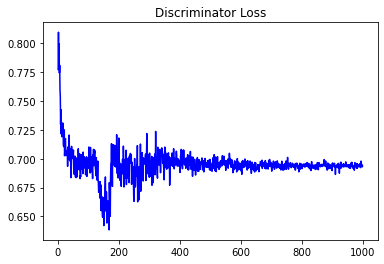

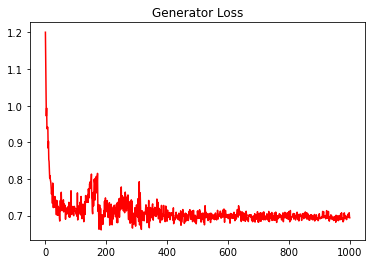

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.8688968098312616


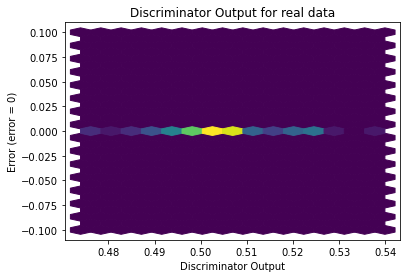

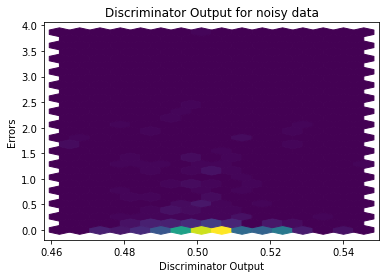

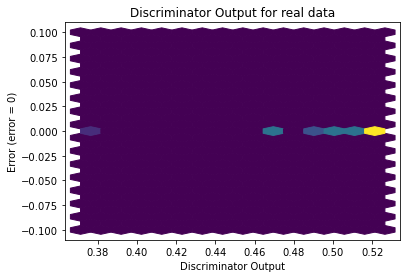

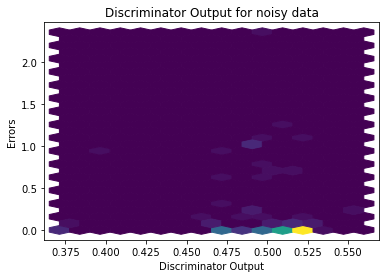

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

In [ ]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

In [ ]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [ ]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


In [ ]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

In [ ]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


In [ ]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

In [ ]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())